In [2]:
# imports

!pip install numpy
!pip install scikit-learn
!pip install seaborn

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import pandas as pd

In [3]:
# The data

from datetime import datetime
import pandas as pd

# Read the CSV file
df = pd.read_csv('AAPL5Y.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the number of days since '05/22/2019' for each date
start_date = datetime.strptime('05/22/2019', '%m/%d/%Y')
df['Days'] = (df['Date'] - start_date).dt.days

# Extract the 'Close/Last' prices and remove the '$' sign
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)

# Now, 'X' is the 'Days' column and 'Y' is the 'Close/Last' column
X = df['Days'].values.reshape(-1, 1)
Y = df['Close/Last'].values.reshape(-1, 1)

print(X)
print(Y)

[[1826]
 [1825]
 [1822]
 ...
 [   2]
 [   1]
 [   0]]
[[192.35  ]
 [191.04  ]
 [189.87  ]
 ...
 [ 44.7425]
 [ 44.915 ]
 [ 45.695 ]]


In [4]:
# load dataset using pandas

aapl = pd.read_csv('AAPL5Y.csv')

In [5]:
aapl

,Date,Close/Last,Volume,Open,High,Low
0,05/21/2024,$192.35,42309400,$191.09,$192.73,$190.9201
1,05/20/2024,$191.04,44361280,$189.325,$191.9199,$189.01
2,05/17/2024,$189.87,41282930,$189.51,$190.81,$189.18
3,05/16/2024,$189.84,52845230,$190.47,$191.095,$189.6601
4,05/15/2024,$189.72,70399990,$187.91,$190.65,$187.37
...,...,...,...,...,...,...
1254,05/29/2019,$44.345,113924680,$44.105,$44.8375,$44.00
1255,05/28/2019,$44.5575,111792640,$44.73,$45.1475,$44.4775
1256,05/24/2019,$44.7425,94858760,$45.05,$45.535,$44.655
1257,05/23/2019,$44.915,146118960,$44.95,$45.135,$44.4525


<Axes: xlabel='Date', ylabel='Close/Last'>

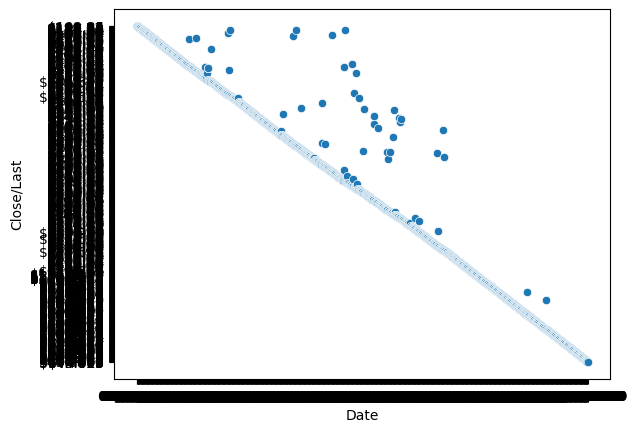

In [6]:
# seaborn plot


sns.scatterplot(x='Date', y='Close/Last', data=aapl)

In [10]:
# Transform X to polynomial features
poly = PolynomialFeatures(degree=38)
X_poly = poly.fit_transform(X)

# Fit the model to the data
reg = LinearRegression()
reg.fit(X_poly, Y)

# Predict the value for an input of 11.5
X_test = poly.transform(np.array([[30.0]]))
prediction = reg.predict(X_test)

print("The prediction for an input of 30.0 is:", prediction)

The prediction for an input of 30.0 is: [[68826.80094226]]


In [8]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model to the training data
reg.fit(X_train, Y_train)

# Predict the outputs for the test set
Y_pred = reg.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate the Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 2.22728658875904
Mean Squared Error: 7.551460351780659
R-squared score: 0.898356866121195


<Axes: xlabel='0', ylabel='165.38'>

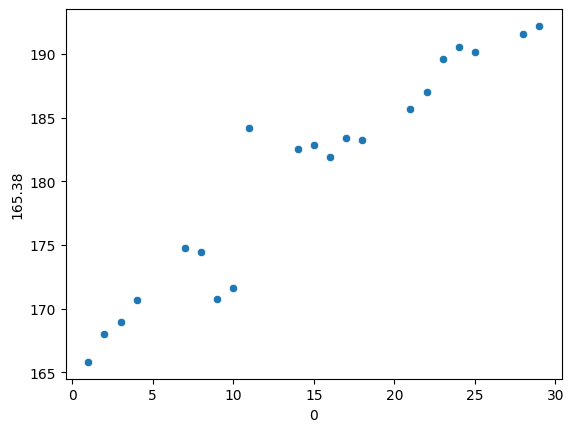

In [9]:
# seaborn plot


sns.scatterplot(x='0', y='165.38', data=aapl)